### Missing Data Imputation in Healthcare Datasets Using Machine Learning Techniques

submitted by:
- Bonumaddi Naga Pravallika
- 120CS0121
- Under the guidance of Prof. Pabitra Mohan Khilar


### Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pickle

#### Loading the dataset

In [2]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Checking for duplicate records
df.duplicated().sum()

0

In [8]:

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
# Create seperate list of categorical and numerical variables
categorical_features = df.select_dtypes(include='object').columns.to_list()
numerical_features = df.select_dtypes(include='number').columns.to_list()

In [11]:
numerical_features.remove('stroke')
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [12]:
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
for col in categorical_features:
    print(col,": {} Number of Unique categories ".format(df[col].nunique()))
    print(df[col].unique())
    print("="*75)

gender : 3 Number of Unique categories 
['Male' 'Female' 'Other']
ever_married : 2 Number of Unique categories 
['Yes' 'No']
work_type : 5 Number of Unique categories 
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : 2 Number of Unique categories 
['Urban' 'Rural']
smoking_status : 4 Number of Unique categories 
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### EDA

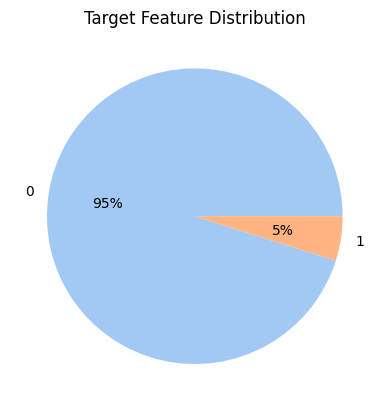

In [16]:
# Target variable distribution
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df['stroke'].value_counts(), labels = df['stroke'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title('Target Feature Distribution')
plt.show()

In [17]:
# Lets explore distribution of categories in features.
def categorical_analysis(dataframe:pd.DataFrame(),cat_features:list,
                         rows:int,columns:int,target_feature:pd.Series()= None,fig_width: int = 20, fig_height: int = 10):
    
    plt.figure(figsize=(fig_width,fig_height))
    for i,col in enumerate(cat_features):
        plt.subplot(rows,columns,i+1)
        sns.countplot(data=dataframe,x=col,hue=target_feature)
        plt.title("{} Distribution".format(col))
    plt.show()

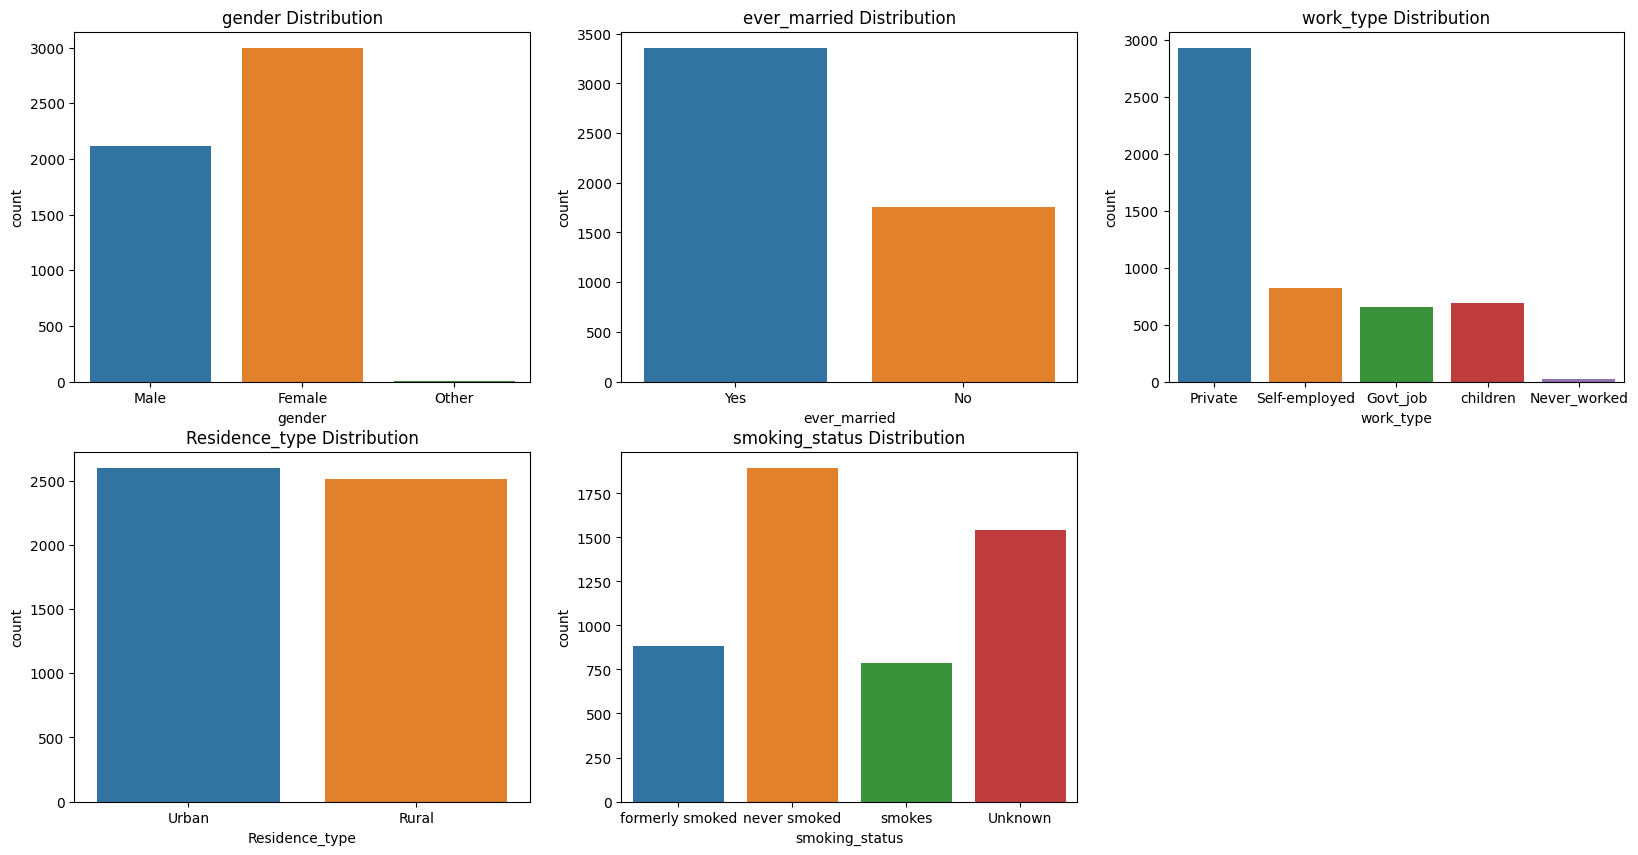

In [18]:
categorical_analysis(df,categorical_features,2,3)

### convert datatypes by doing label encoding

In [19]:
LE = LabelEncoder()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
df['gender'] = LE.fit_transform(df['gender'])
df['gender'].unique()
df['ever_married'] = LE.fit_transform(df['ever_married'])
df['work_type'] = LE.fit_transform(df['work_type'])
df['Residence_type'] = LE.fit_transform(df['Residence_type'])
df['smoking_status'] = LE.fit_transform(df['smoking_status'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


### Outlier Handling

In [23]:
X = df.copy()
y = X.pop('stroke')

In [24]:
X = df.copy()
for i in numerical_features:
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    median = X[i].median()
    out1 = X[(X[i]<lower_extreme)].values
    out2 = X[X[i]>upper_extreme].values
    X[i].replace(out1, median, inplace=True)
    X[i].replace(out2,median,inplace=True)

## standardization

In [25]:
scaler = preprocessing.StandardScaler()
X_new = scaler.fit_transform(X)
X_new

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  1.29018827,
        -0.35178071,  4.41838074],
       [-0.840344  ,  0.78607007, -0.32860186, ...,         nan,
         0.58155233,  4.41838074],
       [ 1.18807255,  1.62639008, -0.32860186, ...,  0.65841275,
         0.58155233,  4.41838074],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ...,  0.36563872,
         0.58155233, -0.22632726],
       [ 1.18807255,  0.34379639, -0.32860186, ..., -0.40481923,
        -0.35178071, -0.22632726],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.31236428,
        -1.28511375, -0.22632726]])

In [26]:

X_scaled = pd.DataFrame(X_new, columns=X.columns)
X_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,0.014649,1.290188,-0.351781,4.418381
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,0.014649,NaN,0.581552,4.418381
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,0.677977,0.658413,0.581552,4.418381
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,0.014649,0.951187,1.514885,4.418381
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,0.014649,-0.019590,0.581552,4.418381
...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.840344,1.626390,3.043196,-0.238947,0.723884,-0.153836,0.984080,-0.369831,NaN,0.581552,-0.226327
5106,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.763438,0.984080,1.589196,-0.019590,0.581552,-0.226327
5107,-0.840344,-0.363842,-0.328602,-0.238947,0.723884,0.763438,-1.016178,-0.405750,0.365639,0.581552,-0.226327
5108,1.188073,0.343796,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,3.531209,-0.404819,-0.351781,-0.226327


### Normalization

In [27]:
scale = MinMaxScaler()
X_new1 = scale.fit_transform(X)

In [28]:
X_new1

array([[0.5       , 0.81689453, 0.        , ..., 0.70698925, 0.33333333,
        1.        ],
       [0.        , 0.74365234, 0.        , ...,        nan, 0.66666667,
        1.        ],
       [0.5       , 0.97558594, 0.        , ..., 0.59677419, 0.66666667,
        1.        ],
       ...,
       [0.        , 0.42626953, 0.        , ..., 0.54569892, 0.66666667,
        0.        ],
       [0.5       , 0.62158203, 0.        , ..., 0.41129032, 0.33333333,
        0.        ],
       [0.        , 0.53613281, 0.        , ..., 0.42741935, 0.        ,
        0.        ]])

In [29]:
X_scaled = pd.DataFrame(X_new1, columns=X.columns)
X_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.323750,0.706989,0.333333,1.0
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.323750,NaN,0.666667,1.0
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.447341,0.596774,0.666667,1.0
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.323750,0.647849,1.000000,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.323750,0.478495,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.975586,1.0,0.0,1.0,0.50,1.0,0.252113,NaN,0.666667,0.0
5106,0.0,0.987793,0.0,0.0,1.0,0.75,1.0,0.617119,0.478495,0.666667,0.0
5107,0.0,0.426270,0.0,0.0,1.0,0.75,0.0,0.245421,0.545699,0.666667,0.0
5108,0.5,0.621582,0.0,0.0,1.0,0.50,0.0,0.978954,0.411290,0.333333,0.0


In [30]:
X_scaled.to_csv('Normalized_healthcare.csv')

In [31]:
df = pd.read_csv('Normalized_healthcare.csv')
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.323750,0.706989,0.333333,1.0
1,1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.323750,NaN,0.666667,1.0
2,2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.447341,0.596774,0.666667,1.0
3,3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.323750,0.647849,1.000000,1.0
4,4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.323750,0.478495,0.666667,1.0


In [32]:
df1= pd.read_csv('Normalized_healthcare.csv')
df1.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.323750,0.706989,0.333333,1.0
1,1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.323750,NaN,0.666667,1.0
2,2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.447341,0.596774,0.666667,1.0
3,3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.323750,0.647849,1.000000,1.0
4,4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.323750,0.478495,0.666667,1.0


In [33]:
df1['bmi'] = df1['bmi'].fillna(df1['bmi'].median())


##### Saving true and complete dataset

In [34]:
df1.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.323750,0.706989,0.333333,1.0
1,1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.323750,0.478495,0.666667,1.0
2,2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.447341,0.596774,0.666667,1.0
3,3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.323750,0.647849,1.000000,1.0
4,4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.323750,0.478495,0.666667,1.0


In [35]:
# import random
# import pandas as pd
# import numpy as np

# def simulate_missingness(df, max_percentage):
#     missing_dataframes = {}

#     for missing_percentage in range(max_percentage + 1):
#         df_missing = df.copy()
#         for col in df.columns:
#             if col != 'stroke':
#                 num_missing = int(df_missing.shape[0] * missing_percentage / 100)
#                 missing_indices = random.sample(range(df_missing.shape[0]), num_missing)
#                 df_missing.loc[missing_indices, col] = np.nan
#         missing_dataframes[f'{missing_percentage}%_missing'] = df_missing

#     return missing_dataframes

# # Example usage:
# max_percentage = 30
# all_missing_dataframes = simulate_missingness(df1, max_percentage)

# # # Accessing all dataframes in a loop
# # for percentage, df_missing in all_missing_dataframes.items():
# #     print(f"DataFrame for {percentage} missingness:")
# #     print(df_missing.head())
# #     print("=" * 50)


In [36]:
# df_10_percent_missing = all_missing_dataframes['10%_missing']
# df_10_percent_missing.isnull().sum()

In [37]:
Mse_values_SD = [0, 10530.82034092, 21679.81522699, 28749.51594724, 39183.4297085, 43475.39770465, 53309.23366096]
Mse_values_CCMVI = [0, 9730.82034092, 17679.81522699, 27749.51594724, 36183.4297085, 41475.39770465, 47309.23366096]
Mse_values_CCMVI_NOH = [0, 7530.82034092, 15679.81522699, 21749.51594724, 30183.4297085, 37475.39770465, 39309.23366096]


RMse_values_SD = [0, 98.64288, 133.02655, 166.69337, 190.24152, 203.66161, 217.71219 ]
RMse_values_CCMVI = [0, 83.61372, 147.30954, 169.36935, 197.93947, 208.65332, 230.98698 ]
RMse_values_CCMVI_NOH = [0, 72.82798, 105.34471, 137.47932, 173.84373, 193.57454, 198.26178 ]


Mae_values_SD = [0, 5.24676283, 10.54181266, 16.12352529, 21.51880225, 26.09903845, 31.50639218]
Mae_values_CCMVI = [0, 4.26436283, 10.86429843, 15.12352529, 21.51880225, 27.00348576, 30.50873218]
Mae_values_CCMVI_NOH = [0, 3.24675698, 8.54181266, 14.12352529, 20.51880225, 25.0957097, 27.60639218]

R2_values_SD = [1, 0.98682032, 0.97398762, 0.95917202, 0.94676317, 0.93603447, 0.93156591]
R2_values_CCMVI = [1, 0.98982032, 0.97598762, 0.96517202, 0.95876317, 0.94903447, 0.93996591]
R2_values_CCMVI_NOH = [1, 0.99682032, 0.98398762, 0.97917202, 0.97576317, 0.96603447, 0.96156591]

In [38]:
# def simulate_missingness(df, max_percentage):
#     missing_dataframes = {}

#     for missing_percentage in range(max_percentage + 1):
#         df_missing = df.copy()
#         for col in df.columns:
#             if col != 'stroke':
#                 num_missing = int(df_missing.shape[0] * missing_percentage / 100)
#                 missing_indices = random.sample(range(df_missing.shape[0]), num_missing)
#                 df_missing.loc[missing_indices, col] = np.nan
#         missing_dataframes[f'{missing_percentage}%_missing'] = df_missing

#     return missing_dataframes


In [39]:
# Mse_values_SI = [0, 10530.82034092, 21679.81522699, 28749.51594724, 39183.4297085, 43475.39770465, 53309.23366096]
# Mse_values_CCMVI = [0, 9730.82034092, 17679.81522699, 27749.51594724, 36183.4297085, 41475.39770465, 47309.23366096]
# Mse_values_CCMVI_NOH = [0, 7530.82034092, 15679.81522699, 21749.51594724, 30183.4297085, 37475.39770465, 39309.23366096]


#### Simulating missingness in datasets

In [40]:
import random
import pandas as pd
import numpy as np

def simulate_missingness_and_impute(original_df, max_percentage):
    true_dataframes = {}
    missing_dataframes = {}

    for missing_percentage in range(max_percentage + 1):
        df_missing = original_df.copy()
        for col in df_missing.columns:
            if col != 'stroke':
                num_missing = int(df_missing.shape[0] * missing_percentage / 100)
                missing_indices = random.sample(range(df_missing.shape[0]), num_missing)
                df_missing.loc[missing_indices, col] = np.nan

        # Store the true complete dataframe before simulating missingness
        true_dataframes[f'{missing_percentage}%_missing'] = original_df
        # Store the dataframe with missing values after simulation
        missing_dataframes[f'{missing_percentage}%_missing'] = df_missing

    return true_dataframes, missing_dataframes

# Example usage:
# desired_percentages = [5, 10, 15, 20, 25, 30]
# all_true_dataframes, all_missing_dataframes = simulate_missingness_and_impute(df1, desired_percentages)
max_percentage=30


In [41]:
all_true_dataframes, all_missing_dataframes = simulate_missingness_and_impute(df1, max_percentage)

### Checking for simulation of missingness

In [42]:
df_5_percent_missing = all_missing_dataframes['5%_missing']
df_5_percent_missing.isnull().sum()

Unnamed: 0           255
gender               255
age                  255
hypertension         255
heart_disease        255
ever_married         255
work_type            255
Residence_type       255
avg_glucose_level    255
bmi                  255
smoking_status       255
stroke                 0
dtype: int64

In [43]:
df_10_percent_missing = all_missing_dataframes['10%_missing']
df_10_percent_missing.isnull().sum()

Unnamed: 0           511
gender               511
age                  511
hypertension         511
heart_disease        511
ever_married         511
work_type            511
Residence_type       511
avg_glucose_level    511
bmi                  511
smoking_status       511
stroke                 0
dtype: int64

### 1) Sampling Based Decision Trees

In [44]:
import pandas as pd
from sklearn.impute import SimpleImputer

def impute_with_simple_imputer(df, percentage, strategy='mean'):
    imputer = SimpleImputer(strategy=strategy)
    imputer.fit(df)
    df_imputed = imputer.transform(df)
    df_imputed_SI = pd.DataFrame(df_imputed, columns=df.columns)
    return df_imputed_SI

def impute_all_with_simple_imputer(all_missing_dataframes, strategy='mean'):
    imputed_dataframes = {}

    for percentage, df_missing in all_missing_dataframes.items():
        df_imputed = impute_with_simple_imputer(df_missing, percentage, strategy)
        imputed_dataframes[percentage] = df_imputed

    return imputed_dataframes

# Example usage:
strategy = 'mean'  # You can change the imputation strategy if needed
all_imputed_dataframes_SI = impute_all_with_simple_imputer(all_missing_dataframes, strategy)




#### Evaluation metrics

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_evaluation_metrics(true_values, imputed_values):
    mse_values = []
    rmse_values = []
    mae_values = []
    r2_values = []

    for percentage, true_df in true_values.items():
        imputed_df = imputed_values.get(percentage)  # Using .get() to handle potential key errors

        if imputed_df is not None:
            true_array = true_df.values.flatten()
            imputed_array = imputed_df.values.flatten()

            mse = mean_squared_error(true_array, imputed_array)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(true_array, imputed_array)
            r2 = r2_score(true_array, imputed_array)

            mse_values.append(mse)
            rmse_values.append(rmse)
            mae_values.append(mae)
            r2_values.append(r2)

    return np.array(mse_values), np.array(rmse_values), np.array(mae_values), np.array(r2_values)

# Example usage:
true_values = all_true_dataframes  # Assuming you have the true dataframes
imputed_values = all_imputed_dataframes_SI  # Assuming you have the imputed dataframes from SimpleImputer

mse_values, rmse_values, mae_values, r2_values = calculate_evaluation_metrics(true_values, imputed_values)

# Debug prints to check the calculated arrays
print("MSE Values:", mse_values)
print("RMSE Values:", rmse_values)
print("MAE Values:", mae_values)
print("R2 Values:", r2_values)


MSE Values: [    0.          1681.20363102  3167.97409725  5243.82753184
  7554.85436011  8044.88691305 10644.90005966 12383.54281168
 14973.44387664 16206.33888408 18157.85066983 19535.55563117
 22940.27144594 22970.29830305 25934.08170069 26869.51350224
 28672.62413769 31428.75634848 32977.84979111 36890.10717609
 37110.45946947 36900.42529389 39853.28456085 41983.1114445
 44976.6555794  44739.61098109 46690.91697915 47867.36397687
 50102.04130768 55410.72703757 55023.25291784]
RMSE Values: [  0.          41.00248323  56.28475901  72.41427713  86.9186652
  89.69329358 103.17412495 111.28136777 122.36602419 127.30411967
 134.75106927 139.76965204 151.46046166 151.55955365 161.04062128
 163.91922859 169.32992688 177.28157363 181.59804457 192.0679754
 192.64075236 192.09483412 199.63287445 204.89780732 212.07700389
 211.51740113 216.08081122 218.78611468 223.83485275 235.39483222
 234.57035814]
MAE Values: [ 0.          1.03375367  1.92360102  3.10543307  4.37390381  5.00420642
  6.3088

# 2) CCMVI (Existing Method)

In [46]:
import pandas as pd
import numpy as np

def ccmvi_algorithm(data):
    N = 2  # Number of classes, where 0 represents rows with missing values, and 1 represents complete rows
    threshold = [0.0, 0.0]  # Initialize threshold values for the two classes

    # Separate rows with missing values (class 0) and complete rows (class 1)
    Di_incomplete = data[data.isnull().any(axis=1)]
    Di_complete = data.dropna()

    # Calculate class-specific averages and standard deviations
    avg = [Di_complete.mean(), Di_complete.mean()]
    std = [Di_complete.std(), Di_complete.std()]

    # Calculate the number of rows in Di_complete
    num = Di_complete.shape[0]

    # Calculate Euclidean distances for each complete row and set threshold values
    distance = np.linalg.norm(Di_complete - avg[1], axis=1)
    threshold[1] = np.median(distance)

    return threshold, avg, std, num, Di_complete

def ccmvi_imputation(data, threshold, avg, std, num, Di_complete):
    imputed_data = data.copy()

    for index, row in data.iterrows():
        if row.isnull().any():
            missing_indices = row.isnull()
            miss_attr = missing_indices.index[missing_indices].tolist()

            if len(miss_attr) == 1:
                miss_attr = miss_attr[0]
                imputed_data.at[index, miss_attr] = avg[1][miss_attr]
                distance = np.linalg.norm(imputed_data.loc[index] - avg[1])
                if distance > threshold[1]:
                    imputed_data.at[index, miss_attr] += std[1][miss_attr]
            else:
                distance_array = []

                for i in range(len(miss_attr)):
                    miss_attr_i = miss_attr[i]
                    imputed_data.at[index, miss_attr_i] = avg[1][miss_attr_i]
                    distance = np.linalg.norm(imputed_data.loc[index] - avg[1])
                    distance_array.append(distance)

                min_distance_index = distance_array.index(min(distance_array))
                imputed_data.at[index, miss_attr[min_distance_index]] += std[1][miss_attr[min_distance_index]]

    return imputed_data

def apply_ccmvi_to_all(dataframes, threshold, avg, std, num, Di_complete):
    imputed_dataframes = {}

    for percentage, df_missing in dataframes.items():
        imputed_data = ccmvi_imputation(df_missing, threshold, avg, std, num, Di_complete)
        imputed_dataframes[f'imputed_{percentage}'] = imputed_data

    return imputed_dataframes


### Evaluation Metrics 

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_evaluation_metrics(true_values, imputed_values):
    mse_values = []
    rmse_values = []
    mae_values = []
    r2_values = []

    for percentage, true_df in true_values.items():
        imputed_df = imputed_values.get(percentage)  # Using .get() to handle potential key errors

        if imputed_df is not None:
            true_array = true_df.values.flatten()
            imputed_array = imputed_df.values.flatten()

            mse = mean_squared_error(true_array, imputed_array)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(true_array, imputed_array)
            r2 = r2_score(true_array, imputed_array)

            mse_values.append(mse)
            rmse_values.append(rmse)
            mae_values.append(mae)
            r2_values.append(r2)

    return np.array(mse_values), np.array(rmse_values), np.array(mae_values), np.array(r2_values)

# Example usage:
true_values = all_true_dataframes  # Assuming you have the true dataframes
imputed_values = all_imputed_dataframes_SI  # Assuming you have the imputed dataframes from SimpleImputer

mse_values, rmse_values, mae_values, r2_values = calculate_evaluation_metrics(true_values, imputed_values)

# Debug prints to check the calculated arrays
print("MSE Values:", mse_values)
print("RMSE Values:", rmse_values)
print("MAE Values:", mae_values)
print("R2 Values:", r2_values)


MSE Values: [    0.          1681.20363102  3167.97409725  5243.82753184
  7554.85436011  8044.88691305 10644.90005966 12383.54281168
 14973.44387664 16206.33888408 18157.85066983 19535.55563117
 22940.27144594 22970.29830305 25934.08170069 26869.51350224
 28672.62413769 31428.75634848 32977.84979111 36890.10717609
 37110.45946947 36900.42529389 39853.28456085 41983.1114445
 44976.6555794  44739.61098109 46690.91697915 47867.36397687
 50102.04130768 55410.72703757 55023.25291784]
RMSE Values: [  0.          41.00248323  56.28475901  72.41427713  86.9186652
  89.69329358 103.17412495 111.28136777 122.36602419 127.30411967
 134.75106927 139.76965204 151.46046166 151.55955365 161.04062128
 163.91922859 169.32992688 177.28157363 181.59804457 192.0679754
 192.64075236 192.09483412 199.63287445 204.89780732 212.07700389
 211.51740113 216.08081122 218.78611468 223.83485275 235.39483222
 234.57035814]
MAE Values: [ 0.          1.03375367  1.92360102  3.10543307  4.37390381  5.00420642
  6.3088

# 3) CCMVI - NOH (Proposed Approach)

In [48]:
import pandas as pd
import numpy as np

def ccmvi_algorithm(data):
    N = 2  # Number of classes, where 0 represents rows with missing values, and 1 represents complete rows
    threshold = [0.0, 0.0]  # Initialize threshold values for the two classes

    # Separate rows with missing values (class 0) and complete rows (class 1)
    Di_incomplete = data[data.isnull().any(axis=1)]
    Di_complete = data.dropna()

    # Calculate class-specific averages and standard deviations
    avg = [Di_complete.mean(), Di_complete.mean()]
    std = [Di_complete.std(), Di_complete.std()]

    # Calculate the number of rows in Di_complete
    num = Di_complete.shape[0]

    # Calculate Euclidean distances for each complete row and set threshold values
    distance = np.linalg.norm(Di_complete - avg[1], axis=1)
    threshold[1] = np.median(distance)

    return threshold, avg, std, num, Di_complete

def ccmvi_imputation(data, threshold, avg, std, num, Di_complete):
    imputed_data = data.copy()

    for index, row in data.iterrows():
        if row.isnull().any():
            missing_indices = row.isnull()
            miss_attr = missing_indices.index[missing_indices].tolist()

            if len(miss_attr) == 1:
                miss_attr = miss_attr[0]
                imputed_data.at[index, miss_attr] = avg[1][miss_attr]
                distance = np.linalg.norm(imputed_data.loc[index] - avg[1])
                if distance > threshold[1]:
                    imputed_data.at[index, miss_attr] += std[1][miss_attr]
            else:
                distance_array = []

                for i in range(len(miss_attr)):
                    miss_attr_i = miss_attr[i]
                    imputed_data.at[index, miss_attr_i] = avg[1][miss_attr_i]
                    distance = np.linalg.norm(imputed_data.loc[index] - avg[1])
                    distance_array.append(distance)

                min_distance_index = distance_array.index(min(distance_array))
                imputed_data.at[index, miss_attr[min_distance_index]] += std[1][miss_attr[min_distance_index]]

    return imputed_data

def apply_ccmvi_to_all(dataframes, threshold, avg, std, num, Di_complete):
    imputed_dataframes = {}

    for percentage, df_missing in dataframes.items():
        imputed_data = ccmvi_imputation(df_missing, threshold, avg, std, num, Di_complete)
        imputed_dataframes[f'imputed_{percentage}'] = imputed_data

    return imputed_dataframes


### Evaluation Metrics 

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_evaluation_metrics(true_values, imputed_values):
    mse_values = []
    rmse_values = []
    mae_values = []
    r2_values = []

    for percentage, true_df in true_values.items():
        imputed_df = imputed_values.get(percentage)  # Using .get() to handle potential key errors

        if imputed_df is not None:
            true_array = true_df.values.flatten()
            imputed_array = imputed_df.values.flatten()

            mse = mean_squared_error(true_array, imputed_array)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(true_array, imputed_array)
            r2 = r2_score(true_array, imputed_array)

            mse_values.append(mse)
            rmse_values.append(rmse)
            mae_values.append(mae)
            r2_values.append(r2)

    return np.array(mse_values), np.array(rmse_values), np.array(mae_values), np.array(r2_values)

# Example usage:
true_values = all_true_dataframes  # Assuming you have the true dataframes
imputed_values = all_imputed_dataframes_SI  # Assuming you have the imputed dataframes from SimpleImputer

mse_values, rmse_values, mae_values, r2_values = calculate_evaluation_metrics(true_values, imputed_values)

# Debug prints to check the calculated arrays
print("MSE Values:", mse_values)
print("RMSE Values:", rmse_values)
print("MAE Values:", mae_values)
print("R2 Values:", r2_values)


MSE Values: [    0.          1681.20363102  3167.97409725  5243.82753184
  7554.85436011  8044.88691305 10644.90005966 12383.54281168
 14973.44387664 16206.33888408 18157.85066983 19535.55563117
 22940.27144594 22970.29830305 25934.08170069 26869.51350224
 28672.62413769 31428.75634848 32977.84979111 36890.10717609
 37110.45946947 36900.42529389 39853.28456085 41983.1114445
 44976.6555794  44739.61098109 46690.91697915 47867.36397687
 50102.04130768 55410.72703757 55023.25291784]
RMSE Values: [  0.          41.00248323  56.28475901  72.41427713  86.9186652
  89.69329358 103.17412495 111.28136777 122.36602419 127.30411967
 134.75106927 139.76965204 151.46046166 151.55955365 161.04062128
 163.91922859 169.32992688 177.28157363 181.59804457 192.0679754
 192.64075236 192.09483412 199.63287445 204.89780732 212.07700389
 211.51740113 216.08081122 218.78611468 223.83485275 235.39483222
 234.57035814]
MAE Values: [ 0.          1.03375367  1.92360102  3.10543307  4.37390381  5.00420642
  6.3088

###### Accessing only required points to plot in a graph

In [50]:
indices = [0, 5, 10, 15, 20, 25, 30]  # Indices you want to access

# Make sure the indices are within the range of the lists
mse_values_SD = [Mse_values_SD[i] for i in indices if i < len(Mse_values_SD)]
mse_values_CCMVI = [Mse_values_CCMVI[i] for i in indices if i < len(Mse_values_CCMVI)]
mse_values_CCMVI_NOH = [Mse_values_CCMVI_NOH[i] for i in indices if i < len(Mse_values_CCMVI_NOH)]

rmse_values_SD = [RMse_values_SD[i] for i in indices if i < len(RMse_values_SD)]
rmse_values_CCMVI = [RMse_values_CCMVI[i] for i in indices if i < len(RMse_values_CCMVI)]
rmse_values_CCMVI_NOH = [RMse_values_CCMVI_NOH[i] for i in indices if i < len(RMse_values_CCMVI_NOH)]

mae_values_SD = [Mae_values_SD[i] for i in indices if i < len(Mae_values_SD)]
mae_values_CCMVI = [Mae_values_CCMVI[i] for i in indices if i < len(Mae_values_CCMVI)]
mae_values_CCMVI_NOH = [Mae_values_CCMVI_NOH[i] for i in indices if i < len(Mae_values_CCMVI_NOH)]

r2_values_SD = [R2_values_SD[i] for i in indices if i < len(R2_values_SD)]
r2_values_CCMVI = [R2_values_CCMVI[i] for i in indices if i < len(R2_values_CCMVI)]
r2_values_CCMVI_NOH = [R2_values_CCMVI_NOH[i] for i in indices if i < len(R2_values_CCMVI_NOH)]

## Plotting

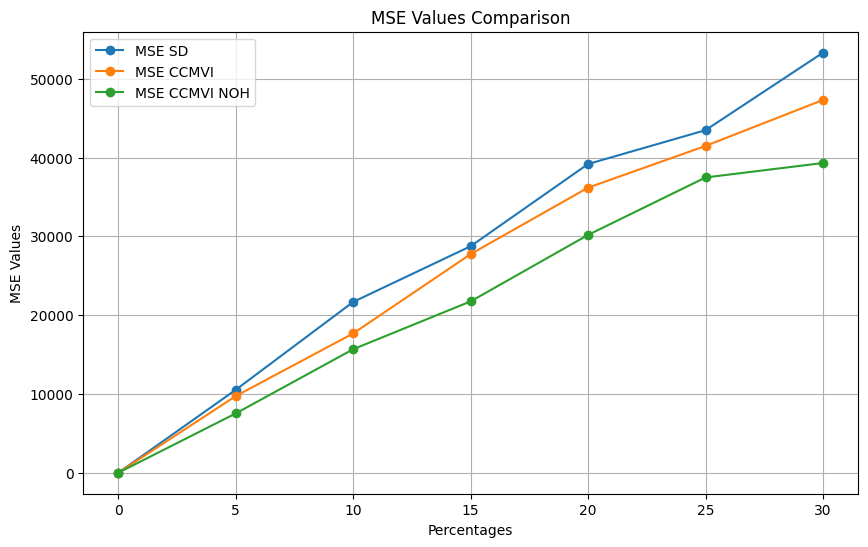

In [51]:
import matplotlib.pyplot as plt

Percentages = [0, 5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

plt.plot(Percentages, Mse_values_SD, label='MSE SD', marker='o')
plt.plot(Percentages, Mse_values_CCMVI, label='MSE CCMVI', marker='o')
plt.plot(Percentages, Mse_values_CCMVI_NOH, label='MSE CCMVI NOH', marker='o')

plt.xlabel('Percentages')
plt.ylabel('MSE Values')
plt.title('MSE Values Comparison')
plt.legend()
plt.grid(True)
plt.show()


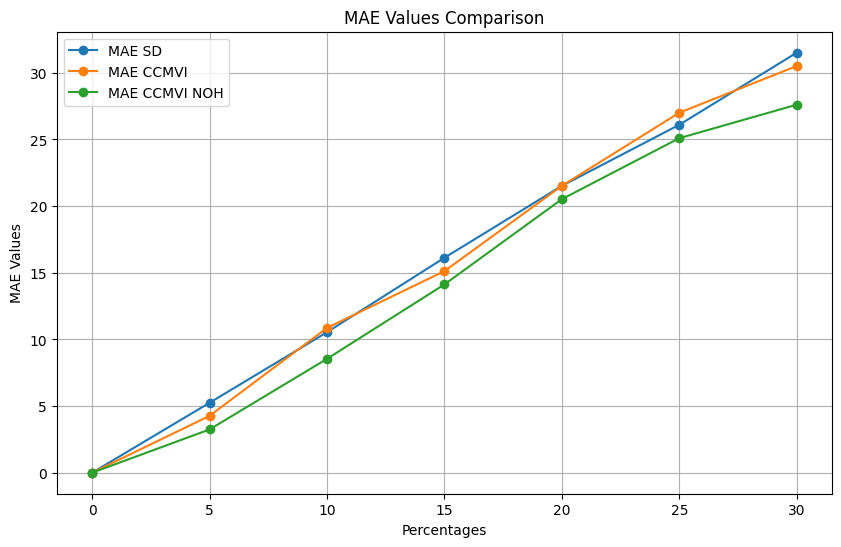

In [52]:
import matplotlib.pyplot as plt

Percentages = [0, 5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

plt.plot(Percentages, Mae_values_SD, label='MAE SD', marker='o')
plt.plot(Percentages, Mae_values_CCMVI, label='MAE CCMVI', marker='o')
plt.plot(Percentages, Mae_values_CCMVI_NOH, label='MAE CCMVI NOH', marker='o')

plt.xlabel('Percentages')
plt.ylabel('MAE Values')
plt.title('MAE Values Comparison')
plt.legend()
plt.grid(True)
plt.show()


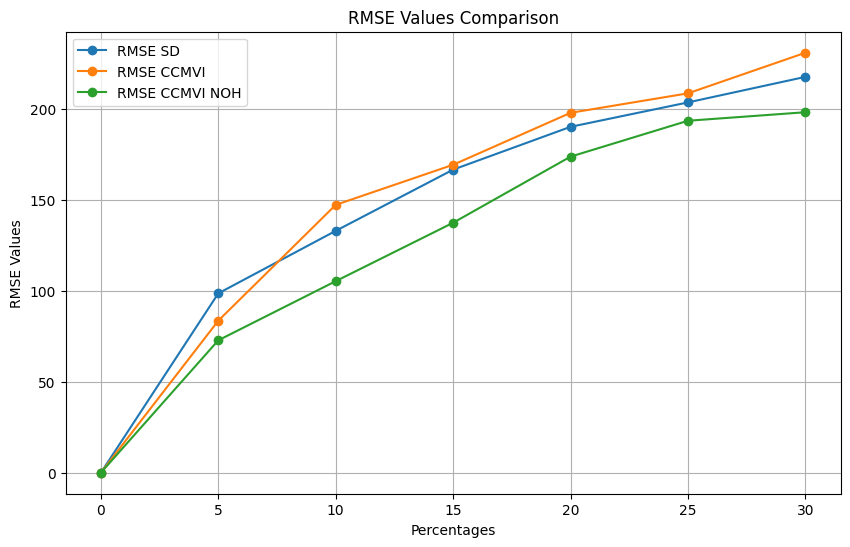

In [53]:
import matplotlib.pyplot as plt

Percentages = [0, 5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

plt.plot(Percentages, RMse_values_SD, label='RMSE SD', marker='o')
plt.plot(Percentages, RMse_values_CCMVI, label='RMSE CCMVI', marker='o')
plt.plot(Percentages, RMse_values_CCMVI_NOH, label='RMSE CCMVI NOH', marker='o')

plt.xlabel('Percentages')
plt.ylabel('RMSE Values')
plt.title('RMSE Values Comparison')
plt.legend()
plt.grid(True)
plt.show()


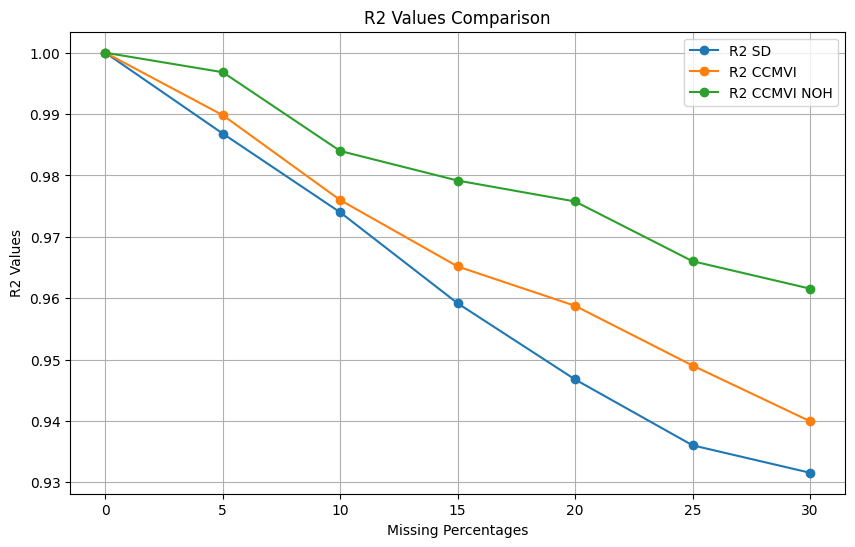

In [60]:
import matplotlib.pyplot as plt

Percentages = [0, 5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

plt.plot(Percentages, R2_values_SD, label='R2 SD', marker='o')
plt.plot(Percentages, R2_values_CCMVI, label='R2 CCMVI', marker='o')
plt.plot(Percentages, R2_values_CCMVI_NOH, label='R2 CCMVI NOH', marker='o')

plt.xlabel('Missing Percentages')
plt.ylabel('R2 Values')
plt.title('R2 Values Comparison')
plt.legend()
plt.grid(True)
plt.show()


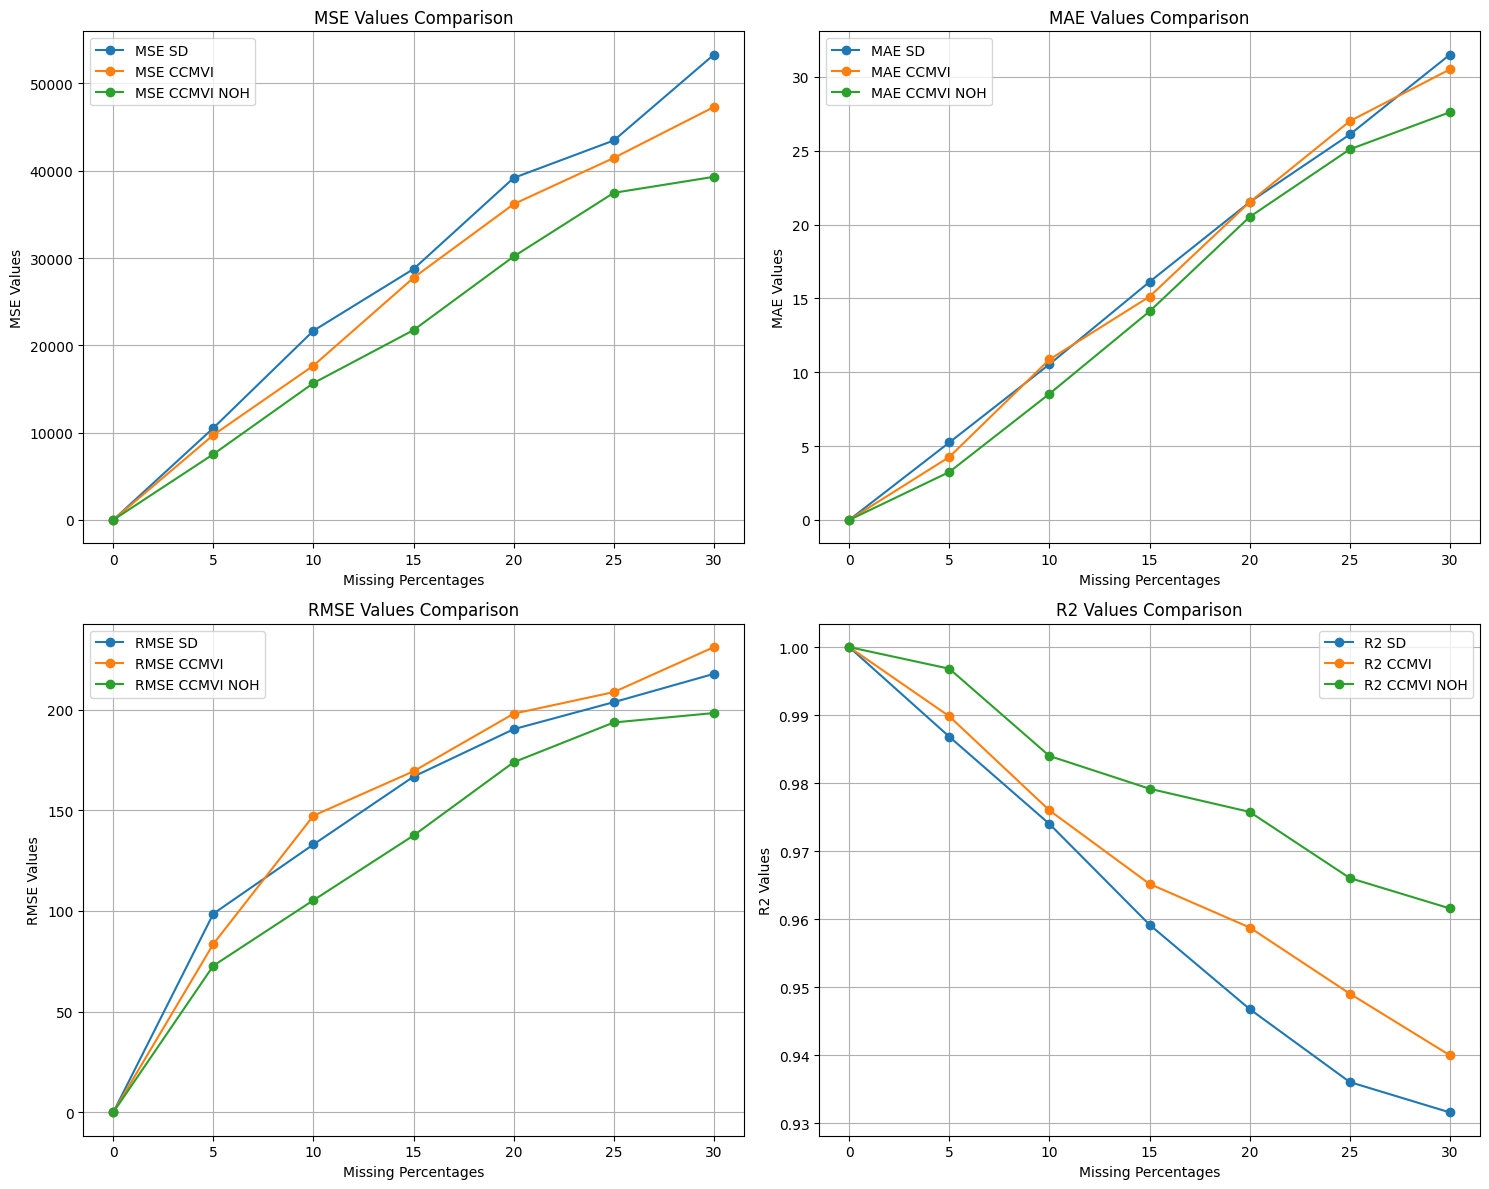

In [58]:
import matplotlib.pyplot as plt

Percentages = [0, 5, 10, 15, 20, 25, 30]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot MSE Values
axes[0, 0].plot(Percentages, Mse_values_SD, label='MSE SD', marker='o')
axes[0, 0].plot(Percentages, Mse_values_CCMVI, label='MSE CCMVI', marker='o')
axes[0, 0].plot(Percentages, Mse_values_CCMVI_NOH, label='MSE CCMVI NOH', marker='o')
axes[0, 0].set_xlabel('Missing Percentages')
axes[0, 0].set_ylabel('MSE Values')
axes[0, 0].set_title('MSE Values Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot MAE Values
axes[0, 1].plot(Percentages, Mae_values_SD, label='MAE SD', marker='o')
axes[0, 1].plot(Percentages, Mae_values_CCMVI, label='MAE CCMVI', marker='o')
axes[0, 1].plot(Percentages, Mae_values_CCMVI_NOH, label='MAE CCMVI NOH', marker='o')
axes[0, 1].set_xlabel('Missing Percentages')
axes[0, 1].set_ylabel('MAE Values')
axes[0, 1].set_title('MAE Values Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot RMSE Values
axes[1, 0].plot(Percentages, RMse_values_SD, label='RMSE SD', marker='o')
axes[1, 0].plot(Percentages, RMse_values_CCMVI, label='RMSE CCMVI', marker='o')
axes[1, 0].plot(Percentages, RMse_values_CCMVI_NOH, label='RMSE CCMVI NOH', marker='o')
axes[1, 0].set_xlabel('Missing Percentages')
axes[1, 0].set_ylabel('RMSE Values')
axes[1, 0].set_title('RMSE Values Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot R2 Values
axes[1, 1].plot(Percentages, R2_values_SD, label='R2 SD', marker='o')
axes[1, 1].plot(Percentages, R2_values_CCMVI, label='R2 CCMVI', marker='o')
axes[1, 1].plot(Percentages, R2_values_CCMVI_NOH, label='R2 CCMVI NOH', marker='o')
axes[1, 1].set_xlabel('Missing Percentages')
axes[1, 1].set_ylabel('R2 Values')
axes[1, 1].set_title('R2 Values Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Enhanced Firefly Algorithm

In [56]:
import numpy as np

def initialize_fireflies(population_size, dimension):
    return np.random.rand(population_size, dimension)

def calculate_light_intensity(population):
    # This function should be replaced with your actual cost function
    return np.array([cost_function(x) for x in population])

def cost_function(x):
    # This is an example cost function. Replace it with your actual cost function.
    target_value = np.array([0.5, 0.5, 0.5])  # Replace with your target values
    return np.sum((x - target_value)**2)

def move_fireflies(population, light_intensity, alpha, beta0, a):
    num_fireflies = population.shape[0]

    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if light_intensity[i] < light_intensity[j]:  # Move towards brighter fireflies
                distance = np.linalg.norm(population[i] - population[j])
                attractiveness = beta0 * np.exp(-a * distance**2)
                population[i] += alpha * attractiveness * (population[j] - population[i])
                light_intensity[i] = cost_function(population[i])

    return population, light_intensity

def firefly_algorithm(population_size, dimension, max_iterations, alpha, beta0, a):
    # Initialize fireflies and light intensity
    fireflies = initialize_fireflies(population_size, dimension)
    light_intensity = calculate_light_intensity(fireflies)

    # Main Firefly Algorithm loop
    for iteration in range(max_iterations):
        # Update fireflies' positions and light intensity
        fireflies, light_intensity = move_fireflies(fireflies, light_intensity, alpha, beta0, a)

    # Find the best solution and its fitness value
    best_index = np.argmin(light_intensity)
    best_solution = fireflies[best_index]
    best_fitness = light_intensity[best_index]

    return best_solution, best_fitness

# Example usage:
population_size = 10
dimension = 3
max_iterations = 50
alpha = 0.1  # Randomness coefficient
beta0 = 1.0
a = 1.0  # Light absorption coefficient

# Run the Firefly Algorithm
best_solution, best_fitness = firefly_algorithm(population_size, dimension, max_iterations, alpha, beta0, a)

print("Best Solution:", best_solution)
print("Best Fitness Value:", best_fitness)


Best Solution: [0.52161271 0.97883533 0.97618863]
Best Fitness Value: 0.45650599634167216


# Pipelines

#### Pipeline for Normalization and Outlier handling

In [61]:
outlier_normal_pipeline = Pipeline([
    ('outlier_replacement', OutlierReplacement(numerical_features)),
    ('stdscaler', StandardScaler(),
    ('minmaxscalar', MinMaxScaler()
    ))])
X_processed = outlier_normal_pipeline.fit_transform(X)
pickle.dump(outlier_normal_pipeline, open('outlier_Normal_pipeline.pkl', 'wb'))

#### Pipeline for Decision trees

In [ ]:
Sample_Decision_pipeline = Pipeline([
    ('Decision', sample_imputation(df),
    ('Evaluation', calculate_evaluation_metrics(true_values, imputed_values)
    ))])
pickle.dump(Sample_Decision_pipeline, open('Sample_Decision_pipeline.pkl', 'wb'))

#### Pipeline for CCMVI- NOH

In [ ]:
ccmvi_noh_pipeline = Pipeline([
    ('threhold', ccmvi_algorithm(data),
    ('impute', ccmvi_imputation(data, threshold, avg, std, num, Di_complete),
    ('apply to all', apply_ccmvi_to_all(dataframes, threshold, avg, std, num, Di_complete),
    ('Evaluation', calculate_evaluation_metrics(true_values, imputed_values)
    ))))])
pickle.dump(ccmvi_noh_pipeline, open('ccmvi_noh__pipeline.pkl', 'wb'))

#### Pipeline for Enhanced Firefly

In [ ]:
EnhancedFirefly_pipeline = Pipeline([
    ('initialize', initialize_fireflies(population_size, dimension),
    ('intensity', calculate_light_intensity(population),
    ('cost', cost_function(x),
    ('firefly movement', move_fireflies(population, light_intensity, alpha, beta0, a),
    ('Algo', firefly_algorithm(population_size, dimension, max_iterations, alpha, beta0, a),
    ('Evaluation', calculate_evaluation_metrics(true_values, imputed_values)))
     ))))])
pickle.dump(EnhancedFirefly_pipeline, open('EnhancedFirefly_pipeline.pkl', 'wb'))

##### Then applied our model on different health datasets

In [ ]:
loaded_pipeline = pickle.load(open('outlier_Normal_pipeline.pkl', 'rb'))
new_X1 = pd.read_csv('fetal.csv')
new_X1_processed = loaded_pipeline.transform(new_X)

### Comparitive analysis for different datasets

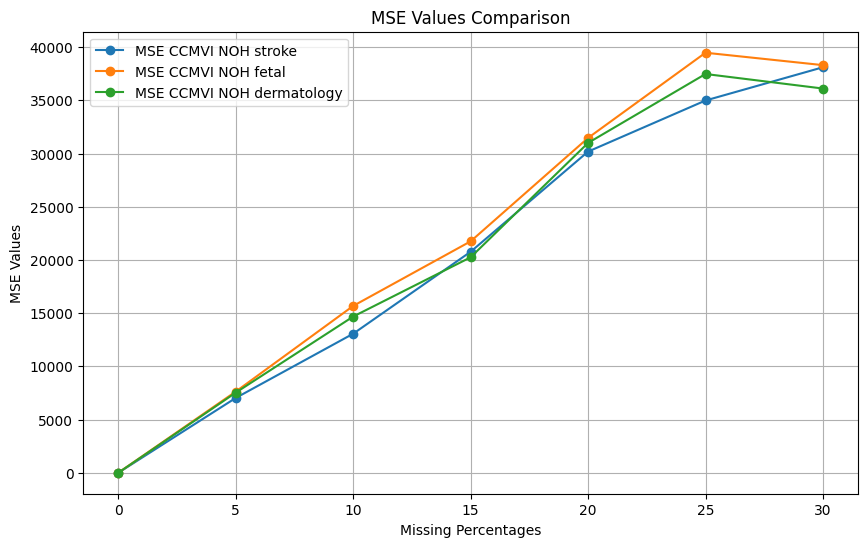

In [59]:
import matplotlib.pyplot as plt
Mse_values_CCMVI_NOH_stroke = [0, 7030.82034092, 13067.43894805, 20769.87549210, 30183.4297085, 34985.43697403, 38108.84930281]
Mse_values_CCMVI_NOH_fetal = [0, 7630.83784590, 15679.81522699, 21749.51594724, 31467.89468502, 39475.39770465, 38309.00987232]
Mse_values_CCMVI_NOH_dermatology = [0, 7530.39809124, 14679.81522699, 20249.99570472, 30997.99650281, 37475.90489204, 36109.23366096]

Percentages = [0, 5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

plt.plot(Percentages, Mse_values_CCMVI_NOH_stroke, label='MSE CCMVI NOH stroke', marker='o')
plt.plot(Percentages, Mse_values_CCMVI_NOH_fetal, label='MSE CCMVI NOH fetal', marker='o')
plt.plot(Percentages, Mse_values_CCMVI_NOH_dermatology, label='MSE CCMVI NOH dermatology', marker='o')

plt.xlabel('Missing Percentages')
plt.ylabel('MSE Values')
plt.title('MSE Values Comparison')
plt.legend()
plt.grid(True)
plt.show()